# 1. 复合分析  
1.1 概述
复合分析（Factorial Analysis）是一种统计分析方法，用于研究多个因素对观测结果的影响，并探究各个因素之间的相互作用效应。

在复合分析中，研究者会选择多个因素（也称为处理变量或独立变量），并对这些因素的不同水平进行组合。每个因素的水平表示该因素所具有的不同取值或条件。通过对不同因素水平的组合进行实验或观测，研究者可以探索这些因素对结果变量（也称为因变量）的影响。

复合分析可以帮助研究者了解以下方面：

主效应（Main Effects）：即每个因素对结果变量的独立影响。通过比较不同因素水平的组合，可以确定每个因素对结果的影响程度。

交互效应（Interaction Effects）：即多个因素之间的相互作用对结果的影响。交互效应表示多个因素同时存在时，它们之间是否存在非加性的影响，即相互作用效应。

复合分析可以应用于各种领域和实验设计，例如生物学、心理学、社会科学等。研究者可以利用复合分析来确定最佳因素组合、解释因素之间的相互作用以及预测结果变量在不同条件下的表现。

在实施复合分析时，常用的统计方法包括方差分析（ANOVA）、线性回归模型、混合效应模型等。这些方法可以帮助研究者对复合分析的数据进行建模和推断，以得出结论和进行预测。

总而言之，复合分析是一种多因素的统计分析方法，用于研究多个因素对观测结果的影响，并探索因素之间的相互作用效应。它可以提供对因素影响和相互作用的深入理解，以支持科学研究和决策制定。

1.2 交叉分析
交叉分析（Cross-Tabulation Analysis）： 交叉分析是一种统计分析方法，用于研究两个或多个变量之间的关系。它通过将数据按照不同变量的不同取值进行分组，并计算各组之间的频数或比例，从而揭示变量之间的相关性或差异。交叉分析常用于描述分类变量之间的关系，例如性别与购买偏好、地区与产品偏好等。

1.3 因子分析
因子分析（Factor Analysis）： 因子分析是一种统计方法，用于探索多个观测变量之间的潜在结构或维度。它通过分析观测变量之间的协方差矩阵，将这些变量归纳为较少的因子或维度，以解释变量之间的共同方差。因子分析可用于数据降维、变量分类和构建潜在变量模型。

1.4分组与钻研
分组与钻研（Segmentation and Drilling）： 分组与钻研是一种数据分析方法，用于将数据按照特定的标准或属性进行分组，并对各组进行深入研究。通过分组与钻研，可以识别出不同组之间的差异和相似性，发现隐藏在数据中的模式和洞察，并为不同组别制定针对性的策略或决策。

1.5聚类分析
聚类分析（Cluster Analysis）： 聚类分析是一种无监督学习方法，用于将相似的个体或对象归类到同一组别中。聚类分析通过测量个体之间的相似性或距离，并将相似的个体划分为不同的簇或群组。聚类分析可用于发现数据中的群集结构、识别潜在的子群体或细分市场，并支持个性化营销、客户分类和产品定位等领域。

1.6 相关分析
相关分析（Correlation Analysis）： 相关分析是一种统计方法，用于衡量两个或多个变量之间的相关性或关联程度。它通过计算变量之间的相关系数（如皮尔逊相关系数）来评估它们之间的线性关系。相关分析可以帮助研究者确定变量之间的正向或负向关系，从而理解它们之间的相互依赖性或影响关系。


In [1]:
pip install --upgrade matplotlib


     |████████████████████████████████| 7.4 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 11.0 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.


# 2. 独立样本t检验

读取HR.csv的数据，里面是某些部门的一些销售情况和离职信息，下面请比较各个部门的离职情况，并作图显示

0.2891069046174478


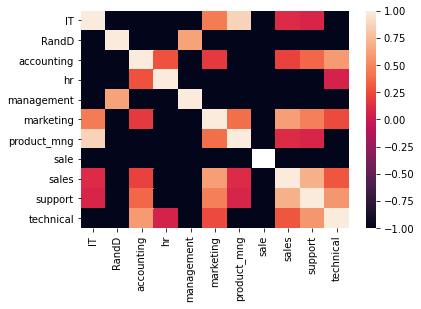

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
 

os.listdir()
# 读取 HR.csv 文件并存储为 DataFrame
df = pd.read_csv('HR.csv')
 
# 按部门分组并获取索引
dp_indices = df.groupby(by="department").indices
 
# 获取销售部门和技术部门的离职情况值
sales_values = df["left"].iloc[dp_indices['sales']].values
technical_values = df["left"].iloc[dp_indices['technical']].values
 
# 执行 t 检验并打印 p 值
t_statistic, p_value = ss.ttest_ind(sales_values, technical_values)
print(p_value)
 
# 获取部门名称列表
dp_keys = list(dp_indices.keys())
 
# 创建用于存储 t 值的矩阵
dp_t_mat = np.zeros([len(dp_keys), len(dp_keys)])
 
# 创建一个新的图形对象
plt.figure()
 
# 遍历部门名称列表，计算 t 值并填充矩阵
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        # 执行 t 检验并获取 p 值
        p_value = ss.ttest_ind(df["left"].iloc[dp_indices[dp_keys[i]]].values,
                               df["left"].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:
            dp_t_mat[i][j] = -1  # 如果 p 值小于 0.05，则将 t 值设置为 -1，表示显著差异
        else:
            dp_t_mat[i][j] = p_value
 
# 绘制热力图并设置部门名称标签
sns.heatmap(dp_t_mat, xticklabels=dp_keys, yticklabels=dp_keys)
 
# 显示图形
plt.show()

导入所需的库：pandas、numpy、matplotlib、scipy.stats 和 seaborn。

读取 HR.csv 文件并将其存储为 DataFrame。

使用 groupby 方法对数据按部门进行分组，并获取各个部门的索引。

从 DataFrame 中提取销售部门和技术部门的离职情况值。

使用 ss.ttest_ind 函数执行 t 检验，比较销售部门和技术部门的离职情况，并打印出 p 值。

创建一个矩阵来存储各个部门之间的 t 值。

创建一个新的图形对象。

使用嵌套循环计算每对部门之间的 t 值，并将结果填充到矩阵中。如果 p 值小于 0.05，则将 t 值设为 -1，表示存在显著差异。

# 3. 分组分析

3.1 概述
分组与钻取是数据分析中常用的技术，用于对数据进行聚合和细分分析。它可以帮助我们从整体数据中获取特定维度的汇总信息，并进一步钻取到更详细的子集数据中进行深入分析。

分组（Grouping）是指根据某个或多个特征将数据集分成多个组或类别。通过对数据进行分组，我们可以计算每个组的统计量（如平均值、总和、计数等），并进行比较、汇总或进一步分析。

钻取（Drilling）是指在分组的基础上，进一步细分数据集，以便更深入地了解特定组或类别的情况。通过钻取操作，我们可以选择特定的分组或类别，并对其进行详细分析，例如计算其子组的统计量、绘制子组的图表等。

在实际应用中，分组与钻取常常结合使用。首先，我们根据某个或多个特征将数据集进行分组，得到分组的汇总统计量。然后，我们可以选择特定的分组，进行钻取操作，深入分析该分组的子集数据，以获取更详细的信息和洞察。

例如，假设我们有一个销售数据集，包含产品名称、销售额、销售地区等信息。我们可以首先根据地区进行分组，计算每个地区的总销售额和平均销售额。然后，我们可以选择某个特定地区，钻取到该地区的子集数据，进一步分析该地区的销售趋势、热门产品等详细信息。

分组与钻取是数据分析中非常灵活和强大的工具，可以帮助我们从整体数据中提取有价值的信息，并深入挖掘数据的细节。它在数据汇总、对比、筛选和洞察等方面具有广泛的应用。

3.2 向上与向下钻取
向上钻取（Drill-Up）和向下钻取（Drill-Down）是在数据分析中进行层级切换的操作。

向上钻取（Drill-Up）是指从较低层级的数据汇总层级切换到较高层级，以获取更广泛的视角和总体概述。通过向上钻取，我们可以从细分的数据汇总层级上升到更高级别的聚合，获取更广泛的汇总信息。这有助于我们了解数据的整体趋势、总体性能等。

举例来说，假设我们有一个销售数据集，包含产品的销售额按年、季度和月份进行了分组汇总。如果我们当前处于月份级别的细分数据，通过向上钻取，我们可以切换到季度级别或年度级别，以获取更高层级的销售额总和和平均值，从而获得更宏观的销售趋势和总体表现。

向下钻取（Drill-Down）则是相反的操作，它是从较高层级的数据汇总层级切换到较低层级，以获得更详细的细分数据。通过向下钻取，我们可以深入到更细致的数据层级，以获取更详细、具体的信息。

继续以上面的例子，假设我们当前处于季度级别的销售数据汇总，通过向下钻取，我们可以切换到月份级别的细分数据，以查看每个季度内各个月份的销售情况，进一步分析季度内的销售趋势和波动情况。

向上钻取和向下钻取是在数据分析中进行层级切换和数据细化的常用操作。它们使分析人员能够根据需要在不同的层级之间切换，从整体和细节两个视角对数据进行深入理解和分析。这种灵活性和可操作性有助于发现数据中的模式、趋势和异常情况，并支持更有针对性的决策和行动。

3.3 连续分组
连续分组（Continuous Grouping）是一种数据分析方法，用于将连续变量划分为不同的组或区间，以便更好地理解数据的分布和趋势。通过连续分组，我们可以将连续变量按照一定的规则划分为若干个区间，然后分析每个区间内的数据特征和统计指标，如频数、均值、中位数等。这有助于我们识别出数据的特定模式、异常值和趋势，并提供对数据分布的更详细描述。

（1）分隔

分隔（一阶差分）是一种数据处理技术，用于计算连续变量在相邻数据点之间的差异或变化。一阶差分可以通过计算当前数据点与前一个数据点之间的差异来表示数据的变化趋势。这对于识别数据中的趋势、周期性和变化点非常有用。通过观察一阶差分的值，我们可以了解数据的增长或减少速度，以及变化的程度。

（2）拐点

拐点（二阶差分）是在一阶差分的基础上进行的进一步处理，用于检测数据变化的拐点或突变点。二阶差分计算的是一阶差分之间的差异，通过观察二阶差分的值，我们可以判断数据变化的趋势是否发生了明显的转折点或拐点。拐点分析可以帮助我们确定数据变化的阶段性特征，识别出数据中的重要变化点，并对数据的结构和趋势进行更精确的分析。

（3）聚类

聚类（Clustering）是一种无监督学习方法，用于将数据样本划分为不同的组或簇，使得同一组内的样本具有较高的相似性，而不同组之间的样本具有较大的差异性。聚类分析可以帮助我们发现数据中的内在模式和结构，将相似的数据点归为一类，并将不同的数据点分离开来。常用的聚类算法包括K-means聚类、层次聚类、DBSCAN等。通过聚类分析，我们可以识别出数据集中的群组、聚集或异常点，并洞察数据的特定模式和分布。

（4）不纯度

不纯度（Gini Impurity）是在决策树算法中用于衡量节点纯度的指标。在分类问题中，不纯度衡量了一个节点中样本的混杂程度，即该节点包含不同类别样本的程度。Gini系数是一种衡量不纯度的指标，常用于衡量分类问题中的类别不平衡程度。在机器学习和决策树算法中经常使用Gini系数来评估节点的纯度。

Gini系数的计算方法如下：
1. 首先，计算每个类别在数据集中的频率或比例。
2. 计算Gini系数的公式为：Gini = 1 - ∑(p^2) ，其中∑表示对所有类别求和，p表示每个类别的频率或比例。
3. Gini系数的取值范围为0到1，0表示数据集的纯度最高，即所有样本都属于同一类别；1表示数据集的纯度最低，即各类别的样本均匀分布。

在分类问题中，使用Gini系数可以评估不同特征的划分能力，选择具有较低Gini系数的特征作为划分点，以提高决策树的分类性能。




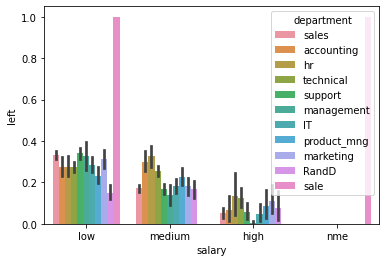

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import os

os.listdir()
# 读取 HR.csv 文件并存储为 DataFrame
df = pd.read_csv('HR.csv')
 
# 设置Seaborn绘图的上下文和字体大小
sns.set_context(font_scale=1.5)
 
 
# 使用Seaborn绘制条形图，其中x轴为"salary"列，y轴为"left"列，hue参数表示按照"department"列进行分组
sns.barplot(x="salary", y="left", hue="department", data=df)
 
# 显示绘图结果
plt.show()


该代码使用了pandas、numpy、matplotlib.pyplot和seaborn库来进行数据处理和可视化。

sns.set_context(font_scale=1.5)：设置Seaborn绘图的上下文，并将字体大小设置为1.5倍，用于调整绘图的整体样式。

df = pd.read_csv("../data/HR.csv")：通过pd.read_csv()函数读取名为"HR.csv"的数据文件，并将数据存储在DataFrame对象df中，用于后续的数据分析和可视化。

sns.barplot(x="salary", y="left", hue="department", data=df)：使用Seaborn的barplot函数绘制条形图。其中，x="salary"表示将"salary"列作为x轴数据，y="left"表示将"left"列作为y轴数据，hue="department"表示按照"department"列进行分组。最终绘制出不同薪资水平下离职率的条形图，并根据部门进行分组和着色。

plt.show()：显示绘制的条形图结果。
从表中可以知道，市场部的工资与离职率很高。工资在中等收入的部门，Hr的离职率是最高的

# 4. 相关分析

相关分析是一种统计分析方法，用于研究两个或多个变量之间的关系和相互影响程度。它帮助我们了解变量之间的线性关系、趋势和相关程度。

4.1 皮尔逊相关


In [1]:
import pandas as pd
s1=pd.Series([0.1, 0.2, 1.1, 2.4, 1.3, 0.3, 0.5])
s2=pd.Series([0.5, 0.4, 1.2, 2.5, 1.1, 0.7, 0.1])
s1.corr(s2)

0.9333729600465923

通过计算s1和s2的相关系数，得到的结果是0.9333729600465923。这个结果表示s1和s2之间存在一个强正相关关系，接近于1，说明两个变量具有高度的线性相关性。

4.2 斯皮尔曼相关


In [2]:
# 斯皮尔曼相关系数
s1.corr(s2,method="spearman")

0.7142857142857144

通过s1.corr(s2, method="spearman")计算得到的结果0.7142857142857144是斯皮尔曼相关系数。斯皮尔曼相关系数是一种非参数的排名相关系数，用于衡量两个变量之间的单调关系，而不是线性关系。该系数的取值范围为-1到1，其中1表示完全的正相关，-1表示完全的负相关，0表示没有单调关系。

在这个例子中，斯皮尔曼相关系数为0.7142857142857144，表明两个变量之间存在着一定的正相关关系，但并非完全的线性关系。

In [4]:
import numpy as np
 
df=pd.DataFrame([s1,s2])
df.corr()


,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [5]:

# 创建一个二维数组，每一列代表一个Series对象的值
array = np.array([s1, s2]).T
 
# 使用二维数组创建DataFrame对象
df = pd.DataFrame(array)
 
# 计算DataFrame对象的相关系数矩阵
df.corr()
 



,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [6]:
#  获取斯皮尔曼矩阵
df.corr(method="spearman")

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


在第一个相关系数矩阵中，每个元素表示两个变量之间的皮尔逊相关系数。由于s1和s2的值都是一样的，因此相关系数矩阵的对角线上的值都为1，表示每个变量与自身的完全正相关。
在第二个相关系数矩阵中，使用np.array([s1,s2]).T创建了一个新的DataFrame，使得s1和s2成为该DataFrame的两列。然后通过df.corr()计算得到的相关系数矩阵，此时得到的是两个变量之间的皮尔逊相关系数。在这个矩阵中，每个元素表示两个变量之间的线性关系程度，其中第(0, 1)和(1, 0)位置的值为0.933373，表示s1和s2之间存在较强的线性相关性。
最后，在第三个相关系数矩阵中，通过df.corr(method="spearman")计算得到的是斯皮尔曼相关系数矩阵。斯皮尔曼相关系数是一种非参数的排名相关系数，用于衡量两个变量之间的单调关系。在这个矩阵中，每个元素表示两个变量之间的单调关系程度。在(0, 1)和(1, 0)位置的值为0.714286，表示s1和s2之间存在一定的单调关系。

相关系数矩阵可以用来衡量变量之间的线性关系（皮尔逊相关系数）或单调关系（斯皮尔曼相关系数）。具体选择哪种相关系数取决于变量类型和分析目的。

请根据给定的HR.CSV的数据，计算不同因素之间的相关性

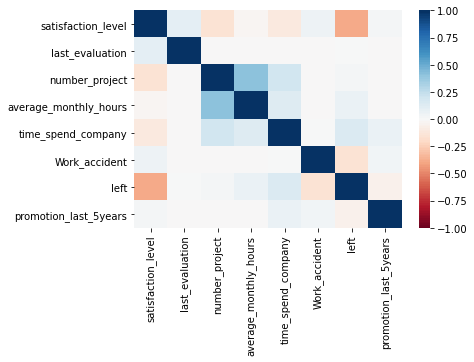

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

os.listdir()
# 读取 HR.csv 文件并存储为 DataFrame
df = pd.read_csv('HR.csv')

# 设置绘图环境的字体大小
sns.set_context(font_scale=1.5)
 
# 提取数值类型的列
numeric_cols = df.select_dtypes(include=[np.number]).columns
 
# 计算相关系数矩阵并绘制热图
sns.heatmap(df[numeric_cols].corr(), vmin=-1, vmax=1, cmap=sns.color_palette("RdBu", n_colors=128))
 
# 显示图形
plt.show()

导入需要使用的库：pandas用于数据处理，matplotlib.pyplot用于绘图，seaborn用于美化绘图风格，scipy.stats用于计算相关系数，numpy用于数据类型操作。
设置绘图环境的字体大小，使得图形更加清晰可读。
使用pd.read_csv()读取数据集，文件路径为"HR.csv"。
通过select_dtypes()方法结合np.number选择数据框中的数值类型的列，将其存储在numeric_cols变量中。
使用df[numeric_cols].corr()计算数值列之间的相关系数矩阵。
使用sns.heatmap()绘制热图，其中vmin和vmax指定了颜色映射的取值范围，cmap指定了使用的颜色映射方案。
使用plt.show()显示图形。


# 5. 熵与互信息

相关分析中的熵、条件熵和互信息是信息论中的概念，用于衡量随机变量之间的关联性。

（1）熵（Entropy）：熵是表示随机变量的不确定性的度量。对于一个离散随机变量，其熵的定义为所有可能取值的信息量的期望值的负数。熵越大，随机变量的不确定性越高。在相关分析中，熵可以用于衡量单个随机变量的不确定性。
（2）条件熵（Conditional Entropy）：条件熵是在给定另一个随机变量的条件下，某个随机变量的不确定性。对于两个随机变量X和Y，给定Y的条件下，X的条件熵定义为在已知Y的取值情况下，X的熵的期望值。条件熵越大，表示X和Y之间的关联性越弱。


In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
 
sns.set_context(font_scale=1.5)
df=pd.read_csv('HR.csv')
s1=pd.Series(["X1","X1","X2","X2","X2","X2"])
s2=pd.Series(["Y1","Y1","Y1","Y2","Y2","Y2"])
 
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    # 如果输入不是 pandas Series，则将其转换为 Series 类型
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    
    # 计算每个值的出现频率并得到概率数组
    prt_ary = pd.value_counts(s).values / float(len(s))
    
    # 计算熵值，即对每个概率取负对数后乘以概率并求和
    entropy = -(np.log2(prt_ary) * prt_ary).sum()
    
    return entropy
 
print("熵值:", getEntropy(s2)) 

熵值: 1.0


In [13]:
#条件熵
# 求取条件熵
def getCondEntropy(s1, s2):
    # 检查输入的序列长度是否相等
    assert len(s1) == len(s2)
    # 创建一个空字典
    d = dict()
    # 构建字典，键为 s1 的值，值为对应的 s2 值的列表
    for i in range(len(s1)):
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    # 计算条件熵，对每个键值对应的列表计算熵值，并加权求和
    cond_entropy = sum([getEntropy(d[k]) * len(d[k]) / float(len(s1)) for k in d])
    return cond_entropy
print("CondEntropy", getCondEntropy(s1,s2)) #Out: CondEntropy 0.5408520829727552
print("CondEntropy", getCondEntropy(s2,s1)) #Out:CondEntropy 0.4591479170272448

CondEntropy 0.5408520829727552
CondEntropy 0.4591479170272448


# 6. 回归分析


6.1 线性回归的基本概念
线性回归是一种有监督的学习算法，它介绍的自变量的和因变量的之间的线性的相关关系，分为一元线性回归和多元的线性回
归。一元线性回归是一个自变量和一个因变量间的回归，可以看成是多远线性回归的特例。线性回归可以用来预测和分类，从
回归方程可以看出自变量和因变量的相互影响关系。
线性回归模型如下：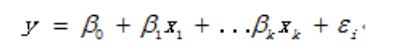
对于线性回归的模型假定如下：
（1） 误差项的均值为0，且误差项与解释变量之间线性无关
（2） 误差项是独立同分布的，即每个误差项之间相互独立且每个误差项的方差是相等的。
（3） 解释变量之间线性无关
（4） 正态性假设，即误差项是服从正态分布的
以上的假设是建立回归模型的基本条件，所以对于回归结果要进行一一验证，如果不满足假定，就要进行相关的修正。


6.2 模型的参数求解
（1）矩估计
一般是通过样本矩来估计总体的参数，常见是样本的一阶原点矩来估计总体的均值，二阶中心矩来估计总体的方差。
（2）最小二乘估计
一般最小二乘估计是适用于因变量是连续型的变量，最常用的是普通最小二乘法（ Ordinary Least Square，OLS），它的原
理是所选择的回归模型应该使所有观察值的残差平方和达到最小。预测值用 表示，对应的实际值 ，残差平方和 ，最小二乘估
计是求得参数的值，使得L最小。对于线性回归求得的参数值是唯一的。
（3）极大似然估计
极大似然估计是基于概率的思想，它要求样本的概率分布是已知的，参数估计的值是使得大量样本发生的概率最大，用似然函
数来度量，似然函数是各个样本的密度函数的乘积，为方便求解对其求对数，加负号求解极小值，得到参数的估计结果。
6.3 模型的优缺点
优点：结果易于理解，计算上不复杂
缺点：对于非线性的数据拟合不好
6.4 一般流程
对于建立模型的一般步骤简单描述如下：
（1） 根据数据的表现形式选取合适的模型
（2） 对选取的模型选取适用的参数估计方法
（3） 对参数的结果进行检验
（4） 对结果进行解释

In [17]:

import numpy as np
 
# 创建一个包含10个元素的一维数组，并将其转换为二维数组，形状为(10, 1)
x = np.arange(10, dtype=float).reshape((10, 1))
 
# 生成一个包含10个随机数的一维数组，并将其转换为二维数组，形状为(10, 1)
random_array = np.random.random((10, 1))
 
# 计算 y 值，根据公式 y = x * 3 + 4 + 随机数
y = x * 3 + 4 + random_array
 
x



array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [18]:
y

array([[ 4.47833646],
       [ 7.56458743],
       [10.50781412],
       [13.91719013],
       [16.03916421],
       [19.79571077],
       [22.17263093],
       [25.82844177],
       [28.65829942],
       [31.4623237 ]])

创建了一个形状为 (10, 1) 的浮点数数组 x，并使用随机数创建了另一个形状相同的数组 y。y 的值是根据 x 的值计算得出的，每个元素乘以 3，加上 4，并加上一个来自均匀分布的随机数。

In [19]:
from sklearn.linear_model import LinearRegression
 
# 创建线性回归模型对象
reg = LinearRegression()
 
# 使用线性回归模型拟合数据
res = reg.fit(x, y)
 
# 使用拟合的模型对输入数据进行预测
y_pred = reg.predict(x)
 
# 打印预测结果
y_pred

 

array([[ 4.52505327],
       [ 7.52891919],
       [10.5327851 ],
       [13.53665102],
       [16.54051694],
       [19.54438285],
       [22.54824877],
       [25.55211469],
       [28.55598061],
       [31.55984652]])

In [20]:
# 打印回归系数（斜率）
reg.coef_



array([[3.00386592]])

In [21]:
# 打印截距
reg.intercept_


array([4.52505327])

举个例子
一元线性回归：就是只包含一个自变量，且该自变量与因变量之间的关系是线性关系。例如通过广告费这一个自变量来预测销量，就属于一元线性回归分析。

多元线性回归：如果回归分析包含两个或以上的自变量，且每个因变量与自变量之间都是线性关系，则称为多元线性回归分析；例如通过肥料、灌溉等人工成本来预测产量，就属于多元线性回归。

一、线性回归分析的思路
确定因变量与自变量。比如通过人工成本费进行产量预测时，人工成本费是自变量，产量是因变量。

确定线性回归分析的类型。例如在一元线性回归分析中，只需要确定自变量与因变量的相关度为强相关性，即可建立一元线性回归方程，从而确定线性回归分析的类型为一元线性回归。

建立线性回归分析模型。

检验线性回归分析模型的拟合程度。为了判断线性回归分析模型是否可用于实际检测，需要检验线性回归分析模型的拟合程度，也就是对模型进行评估，主要以这三个值作为评估标准：(R-squared统计学中的)、Adj.R-squared(即Adiustd )、P值；其中前两个用来衡量线性拟合的拟合程度，P值用来衡量特征变量的显著性。
利用线性回归分析模型进行预测。如果拟合出来的回归分析模型的拟合度符合要求，就可以使用该模型以及计算出的系数a和b得到回归方程，从而根据已有的自变量数据来预测需要的因变量结果。


那我们初中学过的一元一次方程y=ax+b来说：就是最简单的一元线性回归，接下来，我们以给定的作物表型记录本.xlsx数据为例，假设当人工成本为6600元时，产量为多少？我们下面就这一实际生产问题问题进行一元线性回归分析代码演示。

In [11]:
import pandas as pd
import os 
os.listdir()
data= pd.read_excel('作物表型记录本.xlsx',index_col=0)

print(data.head())

    人工成本费(元)  产量(公斤)
序号                  
1       5000     200
2       6500     400
3       7000     500
4       6000     300
5      10000     800


我们要进行的是根据已知的6600人工成本预测产量，由此可知，人工成本费为自变量，产量为因变量。

确定线性回归分析的类型：

In [12]:

# 选中自变量与因变量的数据，x为自变量，y为因变量
x=data[['人工成本费(元)']]
y=data[['产量(公斤)']]
# 确定线性回归分析的类型
corr=data.corr()
print(corr)

          人工成本费(元)    产量(公斤)
人工成本费(元)  1.000000  0.965321
产量(公斤)    0.965321  1.000000


可以看到人工成本与产量之间的相关系数为0.965321，为强相关，随后利用Matplotlib模块进行绘制散点图，代码如下：

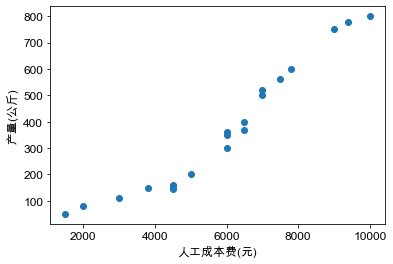

In [13]:
 
# 绘制散点图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei','Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
plt.scatter(x,y)
plt.xlabel('人工成本费(元)')
plt.ylabel('产量(公斤)')
plt.show()

建立回归分析模型以及检验线性回归分析模型的拟合程度：

0.9318449405268809


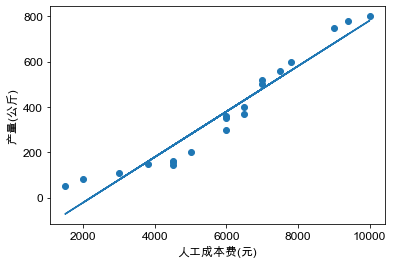

In [14]:
 
#建立回归分析模型
from sklearn.linear_model import LinearRegression  # 需下载Scikit-Learn模块，使用LinearRegression（）函数建立线性回归分析模型
Model=LinearRegression()
Model.fit(x,y)
#检验线性回归分析模型的拟合程度
score=Model.score(x,y)
print(score)
plt.scatter(x,y)
plt.plot(x,Model.predict(x))
plt.xlabel('人工成本费(元)')
plt.ylabel('产量(公斤)')
plt.show()

可以看出大多数散点还是比较靠近这条直线的，说明模型很好的捕捉到了数据特征，可以算是恰当拟合。

利用线性回归分析进行预测：

In [47]:
 
# 预测,也可以进行同时预测多个，如下
y=Model.predict([[6600],[15000],[8888]])
print(y)

[[ 439.71367833]
 [1282.76871005]
 [ 669.34581078]]


6.2 多元线性回归
下面我们利用给定的记录表的虚拟数据假设当农药成本费、肥料成本费、田间管理成本费分别为3400、2900、3100时的产量为多少，下面我们将进行完整代码演示：

    农药成本费(元)  肥料成本费(元)  田间管理成本费(元)  产量(公斤)
序号                                        
1       2000      2500         500     200
2       2200      2600         700     400
3       2500      3400        1100     500
4       3000      1800        1200     300
5       4500      3500        2000     800
            农药成本费(元)  肥料成本费(元)  田间管理成本费(元)    产量(公斤)
农药成本费(元)    1.000000  0.734189    0.590632  0.871877
肥料成本费(元)    0.734189  1.000000    0.314692  0.751138
田间管理成本费(元)  0.590632  0.314692    1.000000  0.774769
产量(公斤)      0.871877  0.751138    0.774769  1.000000


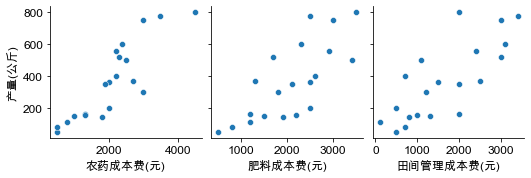

0.9210105130968547


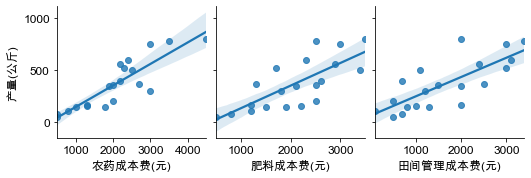

[[722.54953604]]


In [8]:
 
## 确定自变量与因变量
import pandas as pd
import os 
os.listdir()
data= pd.read_excel('记录表.xlsx',index_col=0)
print(data.head())
# 选中自变量与因变量的数据，x为自变量，y为因变量
x=data[['农药成本费(元)','肥料成本费(元)','田间管理成本费(元)']]
y=data[['产量(公斤)']]
# 确定线性回归分析的类型——图3
corr=data.corr()
print(corr)
# 绘制散点图——图1
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei','Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
sns.pairplot(data,x_vars=['农药成本费(元)','肥料成本费(元)','田间管理成本费(元)'],y_vars='产量(公斤)')
plt.show()
 
#建立回归分析模型
from sklearn.linear_model import LinearRegression  # 需下载Scikit-Learn模块，使用LinearRegression（）函数建立线性回归分析模型
Model=LinearRegression()
Model.fit(x,y)
#检验线性回归分析模型的拟合程度——图3
score=Model.score(x,y)
print(score)
# 绘制拟合成果图——图2
sns.pairplot(data,x_vars=['农药成本费(元)','肥料成本费(元)','田间管理成本费(元)'],y_vars='产量(公斤)',kind='reg')# kind参数可添加一条最佳拟合直线和95%的置信带，从而更直观的展示模型的拟合程度
plt.show()
 
# 预测,也可以进行同时预测多个
y=Model.predict([[3400,2900,3100]])
print(y)

# 7. 主成分分析


7.1 主成分分析是一种降维技术，它旨在将高维数据转化为较低维度的表示，同时尽可能保留原始数据的信息。主成分分析通过线性变换将原始变量转化为一组互相无关的主成分，其中每个主成分都是原始变量的线性组合。这些主成分按照其解释的方差大小排序，通常只保留方差较大的主成分。

在探索性因子分析中，主成分分析被用于确定潜在因子的数量和性质。它通过计算每个主成分的方差贡献和特征载荷（变量与主成分之间的相关系数）来帮助解释原始变量之间的相关性和共同性。
主成分分析可以帮助识别潜在因子，并提供每个变量对于每个主成分的贡献程度。

主成分分析的步骤通常包括以下内容：

数据准备：收集相关变量的观测数据，并进行数据清洗和预处理。
计算协方差矩阵或相关系数矩阵：根据数据的特点，计算变量之间的协方差矩阵或相关系数矩阵。
提取主成分：使用特征值分解或奇异值分解等方法，计算协方差矩阵的特征值和特征向量，从中提取主成分。
解释方差贡献：计算每个主成分的方差贡献，并确定保留的主成分数量。
解释主成分：通过观察主成分与原始变量之间的特征载荷，解释每个主成分所代表的意义和含义。
结果解释：根据主成分的解释和方差贡献，解释原始变量之间的相关性和共同性，推断潜在因子结构。
主成分分析在数据降维、变量选择、特征提取等领域有广泛应用。它可以帮助简化复杂的数据集，减少变量的数量，并提供变量之间的结构信息。主成分分析在数据预处理、数据挖掘、模式识别等领域中发挥着重要作用，为后续分析和解释提供


In [22]:
# 创建一个二维数组
data=np.array([np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]), np.array([2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9])]).T
data



array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [24]:
from sklearn.decomposition import PCA
 
# 创建PCA对象并指定降维后的维度为1
lower_dim=PCA(n_components=1)
 # 在原始数据上进行PCA降维
lower_dim.fit(data)
 



PCA(n_components=1)

In [25]:

 # 输出降维后的数据所解释的方差比例
lower_dim.explained_variance_ratio_
 


array([0.96318131])

In [26]:
 
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

以上代码利用sklearn.decomposition模块中的PCA类进行主成分分析。通过创建PCA对象并指定降维后的维度为1，然后调用fit()方法在原始数据上进行PCA降维。降维后的数据可通过调用fit_transform()方法获得，输出的结果是一个二维数组，每行表示一个样本在降维后的空间中的坐标。

主成分分析的结果可以通过explained_variance_ratio_属性获取，它表示每个主成分所解释的方差比例。在这个例子中，降维后的第一个主成分可以解释约96.3%的方差。




In [27]:
import pandas as pd
import numpy as np
def myPCA(data, n_components=100000000):
    # 计算均值向量
    mean_vals=np.mean(data, axis=0)  
    # 数据中心化
    mid=data-mean_vals
    # 计算协方差矩阵
    cov_mat=np.cov(mid,rowvar=False)
    # 利用线性代数库计算特征值和特征向量
    from scipy import linalg
    eig_vals,eig_vects=linalg.eig(np.mat(cov_mat))
    # 对特征值进行排序，取前n_components个特征向量
    eig_val_index=np.argsort(eig_vals)
    eig_val_index=eig_val_index[:-(n_components+1):-1]
    eig_vects=eig_vects[:,eig_val_index]
    # 计算降维后的数据
    low_dim_mat=np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals
data=np.array([np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]), np.array([2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9])]).T
# 调用自定义的PCA函数进行降维
print(myPCA(data,n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))


以上代码定义了一个自定义的PCA函数myPCA，用于进行主成分分析。该函数接受一个数据矩阵和可选的降维维度参数。函数首先计算数据的均值向量，然后将数据中心化，接着计算协方差矩阵。利用线性代数库中的特征值分解函数，计算出特征值和特征向量。对特征值进行排序，取前n_components个特征向量，然后利用这些特征向量对数据进行降维。最后函数返回降维后的数据和特征值。

在代码的最后，调用myPCA函数对给定的数据进行降维，将降维后的数据和特征值打印输出


以我们现有的例子来进行举例分析
还是看HR.csv


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.decomposition import PCA #用于执行主成分分析。

os.listdir()
# 读取 HR.csv 文件并存储为 DataFrame
df = pd.read_csv('HR.csv')

sns.set_context(font_scale=1.5)
 
# 处理缺失值
df = df.dropna()  # 删除包含缺失值的行
 
my_pca = PCA(n_components=7)
lower_mat = my_pca.fit_transform(df.drop(labels=["salary", "department", "left"], axis=1))
print("Ratio:", my_pca.explained_variance_ratio_)


Ratio: [9.98565312e-01 8.69277622e-04 4.73866604e-04 4.96913206e-05
 2.43160255e-05 9.29566680e-06 8.24092853e-06]


In [ ]:
第一个主成分解释了总方差的约99.86%。
第二个主成分解释了总方差的约0.09%。
第三个主成分解释了总方差的约0.05%。
第四个主成分解释了总方差的约0.005%。
第五个主成分解释了总方差的约0.002%。
第六个主成分解释了总方差的约0.001%。
第七个主成分解释了总方差的约0.001%。
这些方差比例表示了每个主成分对数据中的变异程度的贡献。第一个主成分的方差比例最大，说明它包含了最多的信息。随着主成分的编号递增，方差比例逐渐减小，表明后续的主成分解释的方差较小，包含的信息量也较少。

这些方差比例可用于确定选择多少个主成分以保留数据中的有效信息。通常，我们可以选择累计方差比例达到一定阈值（如90%或95%）的主成分作为降维后的特征。


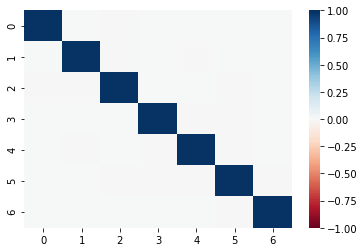

In [31]:
sns.heatmap(pd.DataFrame(lower_mat).corr(), vmin=-1, vmax=1, cmap=sns.color_palette("RdBu", n_colors=128))
plt.show()

In [ ]:
通过主成分分析热图可知，只有对角线上的相关系数几乎为1，其他区域几乎为零，几乎不相关。所以说，主成分分析把原来的特征空间变成了正交的特征空间。

主成分分析将原始特征空间转换为正交的特征空间。在转换后的特征空间中，主成分之间几乎没有相关性，即主成分之间的相关系数接近零，而主成分自身的相关系数接近1。

这种正交性意味着主成分是相互独立的，每个主成分捕捉到数据中的不同方差来源。第一个主成分解释了最大的方差，它是数据中变化最大的方向。随后的主成分依次解释了剩余的方差，并与之前的主成分正交。

因此，通过主成分分析，我们可以通过选择具有较高方差比例的主成分来减少特征的维度，并保留数据中最重要的信息。同时，正交的特征空间使得主成分之间彼此独立，降低了多重共线性的问题，更方便进行后续的统计分析和建模。


处理缺失值：

使用dropna()函数删除包含缺失值的行，更新df。
创建PCA对象my_pca，并设置要提取的主成分数量为7。

使用fit_transform()方法对从df中删除 "salary"、"department" 和 "left" 列后的数据执行主成分分析。将结果存储在lower_mat中。

打印主成分的解释方差比例，即每个主成分所解释的方差的比例。

使用seaborn的heatmap()函数创建相关性热图，传入pd.DataFrame(lower_mat).corr()作为相关性矩阵，设置颜色映射为"RdBu"色板，并指定颜色范围。

使用plt.show()显示绘制的热图。




# 8. 方差分析


方差分析可以用来判断几组观察到的数据或者处理的结果是否存在显著差异。本文介绍的方差分析（Analysis of Variance，简称ANOVA）就是用于检验两组或者两组以上样本的均值是否具备显著性差异的一种数理统计方法


根据影响试验条件的因素个数可以将方差分析分为：单因素方差分析、双因素方差分析、多因素方差分析；双因素方差分析则是分析两个因素对试验指标的影响；多因素方差分析则是分析更多因素指标的分析方法。
以不同城市的月薪收入在每个月的水平上是否存在差异就是多组数据是否存在差异

8.1 单因素方差分析
只考虑单一因素对实验指标的影响

In [5]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import os 
os.listdir()
data= pd.read_excel('jpt.xlsx',index_col=0)
# 先来看下从城市因素开始分析，
df_city=data.melt(var_name='城市',value_name='月薪')#使用melt（）函数将读取数据进行结构转换，以满足ols（）函数对数据格式的要求，melt（）函数能将列标签转换为列数据

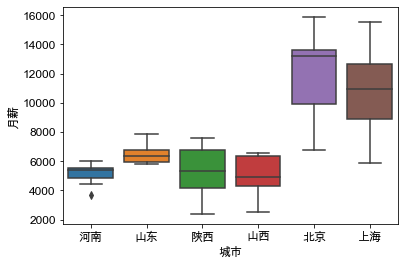

In [7]:
import matplotlib.pyplot  as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong','Arial Unicode MS']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

import os 
os.listdir()
data= pd.read_excel('jpt.xlsx',index_col=0)

data_melt = data.melt()
data_melt.columns = ['城市', '月薪']
sns.boxplot(x = '城市', y = '月薪', data = data_melt)
plt.show()

In [36]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import os 
os.listdir()
data= pd.read_excel('jpt.xlsx',index_col=0)

# 先来看下从城市因素开始分析，
df_city=data.melt(var_name='城市',value_name='月薪')#使用melt（）函数将读取数据进行结构转换，以满足ols（）函数对数据格式的要求，melt（）函数能将列标签转换为列数据
model_city=ols('月薪~C(城市)',df_city).fit()# ols（）创建一线性回归分析模型
anova_table=anova_lm(model_city)# anova_lm（）函数创建模型生成方差分析表
print(anova_table)
# 进行事后比较分析
print(pairwise_tukeyhsd(df_city['月薪'], df_city['城市']))


            df        sum_sq       mean_sq          F        PR(>F)
C(城市)      5.0  6.205769e+08  1.241154e+08  31.043894  4.182242e-16
Residual  66.0  2.638720e+08  3.998061e+06        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
    上海     北京    1096.25 0.7338 -1299.5809  3492.0809  False
    上海     山东 -4532.3333  0.001 -6928.1642 -2136.5025   True
    上海     山西 -6045.5833  0.001 -8441.4142 -3649.7525   True
    上海     河南 -5844.4167  0.001 -8240.2475 -3448.5858   True
    上海     陕西 -5802.1667  0.001 -8197.9975 -3406.3358   True
    北京     山东 -5628.5833  0.001 -8024.4142 -3232.7525   True
    北京     山西 -7141.8333  0.001 -9537.6642 -4746.0025   True
    北京     河南 -6940.6667  0.001 -9336.4975 -4544.8358   True
    北京     陕西 -6898.4167  0.001 -9294.2475 -4502.5858   True
    山东     山西   -1513.25 0.4412 -3909.0809   882.5809  False
   

在结果图上半部分中df为自由度，sum_sq为误差平方和，mean_sq为平均平方
F代表统计量F值，PR(>F)代表显著性水平P值；
下半部分为多重比较，进行事后分析，group1以及group2表示的是因子的不同水平
然后分析他们两个组是否有显著性差异，
最后面的reject表示是否拒绝原假设，True表示的是拒绝原假设，说明两组均值有显著性差异。


8.2 双因素方差分析


In [38]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import os 
os.listdir()
data= pd.read_excel('jpt.xlsx',index_col=0)

df_twoway=data.stack().reset_index()
df_twoway.columns=['月份','城市','月薪']
model_twoway=ols('月薪~C(月份)+C(城市)',df_twoway).fit()
anova_table=anova_lm(model_twoway)
print(anova_table)

            df        sum_sq       mean_sq          F        PR(>F)
C(月份)     11.0  1.813304e+07  1.648458e+06   0.368949  9.627558e-01
C(城市)      5.0  6.205769e+08  1.241154e+08  27.778848  6.425616e-14
Residual  55.0  2.457390e+08  4.467981e+06        NaN           NaN
